In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import vsm

In [2]:
DATA_HOME = os.path.join('/data/daisyxu/data/vsmdata')

In [3]:
imdb5 = pd.read_csv(
    os.path.join(DATA_HOME, 'imdb_window5-scaled.csv.gz'), index_col=0)

In [4]:
imdb20 = pd.read_csv(
    os.path.join(DATA_HOME, 'imdb_window20-flat.csv.gz'), index_col=0)

In [5]:
giga5 = pd.read_csv(
    os.path.join(DATA_HOME, 'giga_window5-scaled.csv.gz'), index_col=0)

In [3]:
giga20 = pd.read_csv(
    os.path.join(DATA_HOME, 'giga_window20-flat.csv.gz'), index_col=0)

In [4]:
giga20.head(20)

,!,);,.,...,;p,</p>,<p>,?,___,abandoned,...,younger,youth,yugoslav,yugoslavia,zealand,zebra,zinc,zombie,zone,zoo
!,940195.0,702.0,621097.0,23437.0,0.0,373658.0,368544.0,59060.0,4516.0,226.0,...,592.0,597.0,191.0,197.0,145.0,14.0,11.0,52.0,944.0,159.0
);,702.0,190241.0,147684.0,288.0,0.0,31224.0,29306.0,934.0,583.0,27.0,...,105.0,80.0,116.0,214.0,424.0,5.0,15.0,5.0,111.0,13.0
.,621097.0,147684.0,305121592.0,1549023.0,1911.0,103978701.0,100660069.0,2725058.0,577519.0,118249.0,...,176762.0,141801.0,164825.0,255798.0,262532.0,4087.0,18139.0,2960.0,261561.0,38939.0
...,23437.0,288.0,1549023.0,2419985.0,0.0,862456.0,853756.0,44523.0,4486.0,413.0,...,671.0,886.0,710.0,912.0,709.0,392.0,6.0,34.0,1523.0,149.0
;p,0.0,0.0,1911.0,0.0,876993.0,347.0,412.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
</p>,373658.0,31224.0,103978701.0,862456.0,347.0,82166513.0,78143019.0,1792315.0,614637.0,54177.0,...,82666.0,70102.0,86230.0,97897.0,102691.0,1915.0,5776.0,1243.0,122211.0,18672.0
<p>,368544.0,29306.0,100660069.0,853756.0,412.0,78143019.0,80558695.0,1784807.0,549266.0,55719.0,...,82421.0,71170.0,90593.0,98973.0,105036.0,2008.0,5821.0,1260.0,121526.0,19134.0
?,59060.0,934.0,2725058.0,44523.0,3.0,1792315.0,1784807.0,2479754.0,4751.0,963.0,...,2811.0,2213.0,330.0,1059.0,505.0,80.0,35.0,93.0,2163.0,510.0
___,4516.0,583.0,577519.0,4486.0,0.0,614637.0,549266.0,4751.0,398063.0,107.0,...,159.0,220.0,214.0,1111.0,3178.0,10.0,15.0,5.0,870.0,121.0
abandoned,226.0,27.0,118249.0,413.0,0.0,54177.0,55719.0,963.0,107.0,67180.0,...,98.0,142.0,127.0,137.0,250.0,5.0,13.0,0.0,238.0,41.0


In [7]:

ABC = pd.DataFrame([
    [ 2.0,  4.0], 
    [10.0, 15.0], 
    [14.0, 10.0]],
    index=['A', 'B', 'C'],
    columns=['x', 'y'])

In [8]:
ABC

,x,y
A,2.0,4.0
B,10.0,15.0
C,14.0,10.0


In [9]:
def plot_ABC(df):
    ax = df.plot.scatter(x='x', y='y', marker='.', legend=False)
    m = df.values.max(axis=None)
    ax.set_xlim([0, m*1.2])
    ax.set_ylim([0, m*1.2])
    for label, row in df.iterrows():
        ax.text(row['x'], row['y'], label)

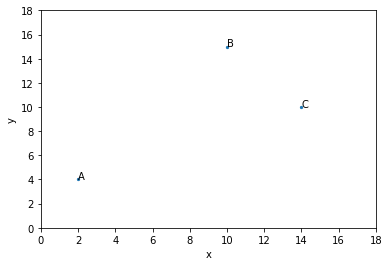

In [10]:
plot_ABC(ABC)

In [11]:
def abc_comparisons(df, distfunc):
    for a, b in (('A', 'B'), ('B', 'C')):
        dist = distfunc(df.loc[a], df.loc[b])
        print('{0:}({1:}, {2:}) = {3:7.02f}'.format(
            distfunc.__name__, a, b, dist))

In [12]:
abc_comparisons(ABC, vsm.euclidean)

euclidean(A, B) =   13.60
euclidean(B, C) =    6.40


In [13]:
ABC_normed = ABC.apply(vsm.length_norm, axis=1)

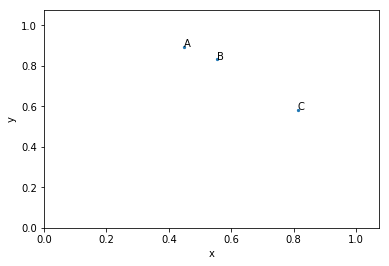

In [14]:
plot_ABC(ABC_normed)

In [15]:
abc_comparisons(ABC_normed, vsm.euclidean)

euclidean(A, B) =    0.12
euclidean(B, C) =    0.36


In [16]:
abc_comparisons(ABC, vsm.cosine)

cosine(A, B) =    0.01
cosine(B, C) =    0.07


In [17]:
for m in (vsm.euclidean, vsm.cosine, vsm.jaccard):
    fmt = {
        'n': m.__name__,  
        'AB': m(ABC.loc['A'], ABC.loc['B']), 
        'BC': m(ABC.loc['B'], ABC.loc['C'])}
    print('{n:>15}(A, B) = {AB:5.2f} {n:>15}(B, C) = {BC:5.2f}'.format(**fmt))

      euclidean(A, B) = 13.60       euclidean(B, C) =  6.40
         cosine(A, B) =  0.01          cosine(B, C) =  0.07
        jaccard(A, B) =  0.76         jaccard(B, C) =  0.31


In [18]:
vsm.neighbors('A', ABC, distfunc=vsm.euclidean)

A     0.000000
C    13.416408
B    13.601471
dtype: float64

In [19]:
vsm.neighbors('A', ABC, distfunc=vsm.cosine)

A    0.000000
B    0.007722
C    0.116212
dtype: float64

In [22]:
vsm.neighbors('good', imdb5, distfunc=vsm.euclidean).head(10)

good            0.000000e+00
job             1.191396e+06
pretty          1.192212e+06
e               1.194603e+06
guys            1.194643e+06
mr              1.195480e+06
surprisingly    1.195572e+06
dr              1.195698e+06
points          1.196074e+06
vs              1.196081e+06
dtype: float64

In [23]:
vsm.neighbors('good', imdb20, distfunc=vsm.euclidean).head(10)

good      0.000000e+00
really    1.709370e+06
great     1.746426e+06
well      1.757869e+06
story     1.760839e+06
see       1.768430e+06
even      1.808932e+06
time      1.818021e+06
also      1.820432e+06
can       1.835667e+06
dtype: float64

In [33]:
vsm.neighbors('bad', imdb5, distfunc=vsm.cosine).head(10)

bad      0.000000
guys     0.823744
.        0.844851
taste    0.893747
guy      0.896312
seed     0.898678
e        0.908640
k        0.910889
g        0.912387
luck     0.913467
dtype: float64

In [34]:
vsm.neighbors('bad', imdb20, distfunc=vsm.cosine).head(10)

bad          0.000000
.            0.156825
guys         0.200954
acting       0.211650
good         0.223481
plain        0.223981
p            0.224692
taste        0.224719
movie        0.229538
redeeming    0.230346
dtype: float64

In [27]:
vsm.neighbors('good', giga20, distfunc=vsm.cosine).head(10)

good      0.000000
.         0.102634
</p>      0.127549
<p>       0.130171
pretty    0.130454
luck      0.136274
said      0.139075
that's    0.147671
bad       0.151318
guess     0.153209
dtype: float64

In [28]:
vsm.neighbors('good', giga5, distfunc=vsm.cosine).head(10)

good      0.000000
.         0.862592
luck      0.881492
pretty    0.885267
</p>      0.908198
et        0.913239
n         0.914124
j         0.915971
p         0.920841
<p>       0.921349
dtype: float64

In [48]:
print(vsm.euclidean(imdb5.loc['small'], imdb5.loc['big']))
print(vsm.euclidean(imdb5.loc['large'], imdb5.loc['big']))

272851.1900152591
255985.38057144164


In [49]:
print(vsm.euclidean(imdb20.loc['small'], imdb20.loc['big']))
print(vsm.euclidean(imdb20.loc['large'], imdb20.loc['big']))

385967.09753293736
460558.3184700934


In [31]:
print(vsm.cosine(imdb5.loc['good'], imdb5.loc['excellent']))
print(vsm.cosine(imdb5.loc['good'], imdb5.loc['bad']))

0.9644382411451131
0.9480014759326252


In [36]:
print(vsm.cosine(imdb20.loc['good'], imdb5.loc['excellent']))
print(vsm.cosine(imdb20.loc['good'], imdb5.loc['bad']))

0.8424783729457648
0.8204966871844426


In [8]:
oe_ex = np.array([[ 34.,  11.], [ 47.,   7.]])

vsm.observed_over_expected(oe_ex).round(2)

array([[0.92, 1.34],
       [1.06, 0.71]])

In [9]:
imdb5_oe = vsm.observed_over_expected(imdb5)

In [10]:
imdb20_oe = vsm.observed_over_expected(imdb20)

In [12]:
vsm.neighbors('good', imdb5_oe).head()

good       0.000000
.          0.716910
movie      0.791847
film       0.825658
measure    0.852617
dtype: float64

In [13]:
vsm.neighbors('good', imdb20_oe).head()

good     0.000000
.        0.081301
movie    0.083552
br       0.086846
film     0.102811
dtype: float64

In [38]:
imdb5_pmi = vsm.pmi(imdb5, positive = False)

In [31]:
imdb20_pmi = vsm.pmi(imdb20, positive = False)

In [4]:
imdb5_smoothed_pmi = vsm.smoothed_pmi(imdb5, positive = False, discounting = True)

In [24]:
vsm.neighbors('good', imdb5_pmi).head()

good      0.000000
great     0.113705
br        0.134048
well      0.135586
better    0.142067
dtype: float64

In [25]:
vsm.neighbors('good', imdb20_pmi).head()

good      0.000000
great     0.188358
really    0.201032
better    0.201591
movie     0.215551
dtype: float64

In [35]:
giga5_pmi = vsm.pmi(giga5)
giga20_pmi = vsm.pmi(giga20)

In [44]:
vsm.neighbors('grand', giga20_pmi).head(10)

grand            0.000000
champion         0.487311
championship     0.497660
title            0.504609
event            0.509751
tour             0.523373
championships    0.533476
racing           0.542730
defending        0.558473
winner           0.559043
dtype: float64

In [45]:
vsm.neighbors('grand', giga5_pmi).head(10)

grand           0.000000
tournament      0.714359
championship    0.716930
title           0.722021
jury            0.724668
singles         0.738751
champions       0.753200
tour            0.755696
sunday's        0.760421
canyon          0.761472
dtype: float64

In [46]:
vsm.neighbors('grand', imdb20_pmi).head(10)

grand           0.000000
breathtaking    0.688007
magnificent     0.706286
sets            0.713897
epic            0.718788
locations       0.718924
scale           0.720199
palace          0.720870
landscape       0.721968
location        0.723636
dtype: float64

In [47]:
vsm.neighbors('grand', imdb5_pmi).head(10)

grand          0.000000
epic           0.357059
spectacular    0.365121
stunning       0.368265
magnificent    0.378787
beautifully    0.379523
impressive     0.386851
exciting       0.391901
worthy         0.394064
greatest       0.394481
dtype: float64

In [5]:
vsm.neighbors('grand', imdb5_smoothed_pmi).head(10)

grand          0.000000
spectacular    0.347858
epic           0.350192
magnificent    0.369905
stunning       0.377333
scale          0.379342
opera          0.398211
impressive     0.400772
beautifully    0.402752
filmed         0.403906
dtype: float64

In [7]:
imdb5_ngrams = vsm.ngram_vsm(imdb5, n=4)

In [8]:
imdb5.shape

(5000, 5000)

In [9]:
imdb5_ngrams.shape

(9806, 5000)

In [12]:
imdb5.head(10)

,!,);,.,..,...,:),?,abandoned,abdomen,abduct,...,zebra,zero,zinc,zombie,zombies,zone,zoo,,,´
!,2.042897e+06,484.716667,5.900860e+04,2663.000000,16021.083333,1693.716667,3.938657e+04,23.883333,0.866667,1.083333,...,7.650000,195.350000,0.166667,361.816667,388.133333,63.733333,21.966667,605.133333,126.500000,334.600000
);,4.847167e+02,18749.933333,2.730167e+02,5.166667,60.033333,2.500000,2.629000e+02,1.166667,0.000000,0.166667,...,0.416667,1.166667,0.000000,2.750000,3.866667,1.283333,0.500000,18.100000,1.916667,0.366667
.,5.900860e+04,273.016667,2.062572e+07,3773.166667,34080.283333,2652.766667,4.840480e+04,1012.583333,32.083333,27.366667,...,55.750000,1936.566667,1.583333,3994.983333,3456.016667,1220.266667,308.233333,2799.016667,733.933333,1945.400000
..,2.663000e+03,5.166667,3.773167e+03,126915.900000,1854.983333,116.250000,1.700117e+03,4.066667,0.000000,0.250000,...,0.250000,11.800000,0.000000,34.766667,26.516667,3.566667,2.616667,13.166667,1.983333,20.550000
...,1.602108e+04,60.033333,3.408028e+04,1854.983333,833286.266667,424.383333,1.082483e+04,29.616667,2.000000,0.733333,...,2.600000,79.166667,0.750000,193.150000,212.700000,45.566667,13.333333,27.350000,10.966667,168.683333
:),1.693717e+03,2.500000,2.652767e+03,116.250000,424.383333,17519.766667,2.960833e+02,0.500000,0.000000,0.000000,...,0.000000,0.616667,0.000000,2.333333,3.183333,1.033333,0.000000,1.000000,0.250000,0.866667
?,3.938657e+04,262.900000,4.840480e+04,1700.116667,10824.833333,296.083333,1.159063e+06,46.950000,3.450000,1.950000,...,3.300000,108.433333,0.500000,260.266667,298.150000,69.900000,21.416667,364.616667,80.850000,131.400000
abandoned,2.388333e+01,1.166667,1.012583e+03,4.066667,29.616667,0.500000,4.695000e+01,10999.700000,0.000000,0.000000,...,0.783333,0.000000,0.000000,3.016667,2.750000,1.633333,2.533333,6.283333,1.400000,0.166667
abdomen,8.666667e-01,0.000000,3.208333e+01,0.000000,2.000000,0.000000,3.450000e+00,0.000000,214.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
abduct,1.083333e+00,0.166667,2.736667e+01,0.250000,0.733333,0.000000,1.950000e+00,0.000000,0.000000,389.000000,...,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
imdb5_ngrams.head(10)

,!,);,.,..,...,:),?,abandoned,abdomen,abduct,...,zebra,zero,zinc,zombie,zombies,zone,zoo,,,´
<w>);</w>,484.716667,18749.933333,273.016667,5.166667,60.033333,2.500000,262.900000,1.166667,0.0,0.166667,...,0.416667,1.166667,0.00,2.750000,3.866667,1.283333,0.500000,18.100000,1.916667,0.366667
<w>..</w>,2663.000000,5.166667,3773.166667,126915.900000,1854.983333,116.250000,1700.116667,4.066667,0.0,0.250000,...,0.250000,11.800000,0.00,34.766667,26.516667,3.566667,2.616667,13.166667,1.983333,20.550000
<w>...,16021.083333,60.033333,34080.283333,1854.983333,833286.266667,424.383333,10824.833333,29.616667,2.0,0.733333,...,2.600000,79.166667,0.75,193.150000,212.700000,45.566667,13.333333,27.350000,10.966667,168.683333
...</w>,16021.083333,60.033333,34080.283333,1854.983333,833286.266667,424.383333,10824.833333,29.616667,2.0,0.733333,...,2.600000,79.166667,0.75,193.150000,212.700000,45.566667,13.333333,27.350000,10.966667,168.683333
<w>:)</w>,1693.716667,2.500000,2652.766667,116.250000,424.383333,17519.766667,296.083333,0.500000,0.0,0.000000,...,0.000000,0.616667,0.00,2.333333,3.183333,1.033333,0.000000,1.000000,0.250000,0.866667
<w>aba,23.883333,1.166667,1012.583333,4.066667,29.616667,0.500000,46.950000,10999.700000,0.0,0.000000,...,0.783333,0.000000,0.00,3.016667,2.750000,1.633333,2.533333,6.283333,1.400000,0.166667
aban,23.883333,1.166667,1012.583333,4.066667,29.616667,0.500000,46.950000,10999.700000,0.0,0.000000,...,0.783333,0.000000,0.00,3.016667,2.750000,1.633333,2.533333,6.283333,1.400000,0.166667
band,463.600000,19.016667,10385.133333,46.483333,317.333333,4.683333,496.500000,11029.550000,0.0,0.250000,...,0.783333,1.250000,0.00,19.183333,12.316667,2.333333,3.400000,51.983333,16.983333,4.133333
ando,118.433333,1.733333,2857.650000,19.750000,127.316667,0.666667,163.883333,11001.683333,0.0,0.000000,...,0.783333,0.200000,0.00,9.566667,12.150000,2.583333,2.733333,17.166667,4.966667,0.366667
ndon,129.416667,3.650000,4084.066667,15.600000,108.683333,1.450000,178.283333,11019.566667,0.0,0.000000,...,0.783333,0.000000,0.00,7.366667,13.750000,5.200000,12.283333,25.916667,5.416667,3.116667


In [11]:
def character_level_rep(word, cf, n=4):
    ngrams = vsm.get_character_ngrams(word, n)
    ngrams = [n for n in ngrams if n in cf.index]    
    reps = cf.loc[ngrams].values
    return reps.sum(axis=0)    

In [24]:
'terrificly' in imdb5.index

False

In [27]:
terrificly = character_level_rep('terrificly', imdb5_ngrams)

In [28]:
terrific = character_level_rep('terrific', imdb5_ngrams)

In [29]:
vsm.cosine(terrificly, terrific)

0.002863699260447383

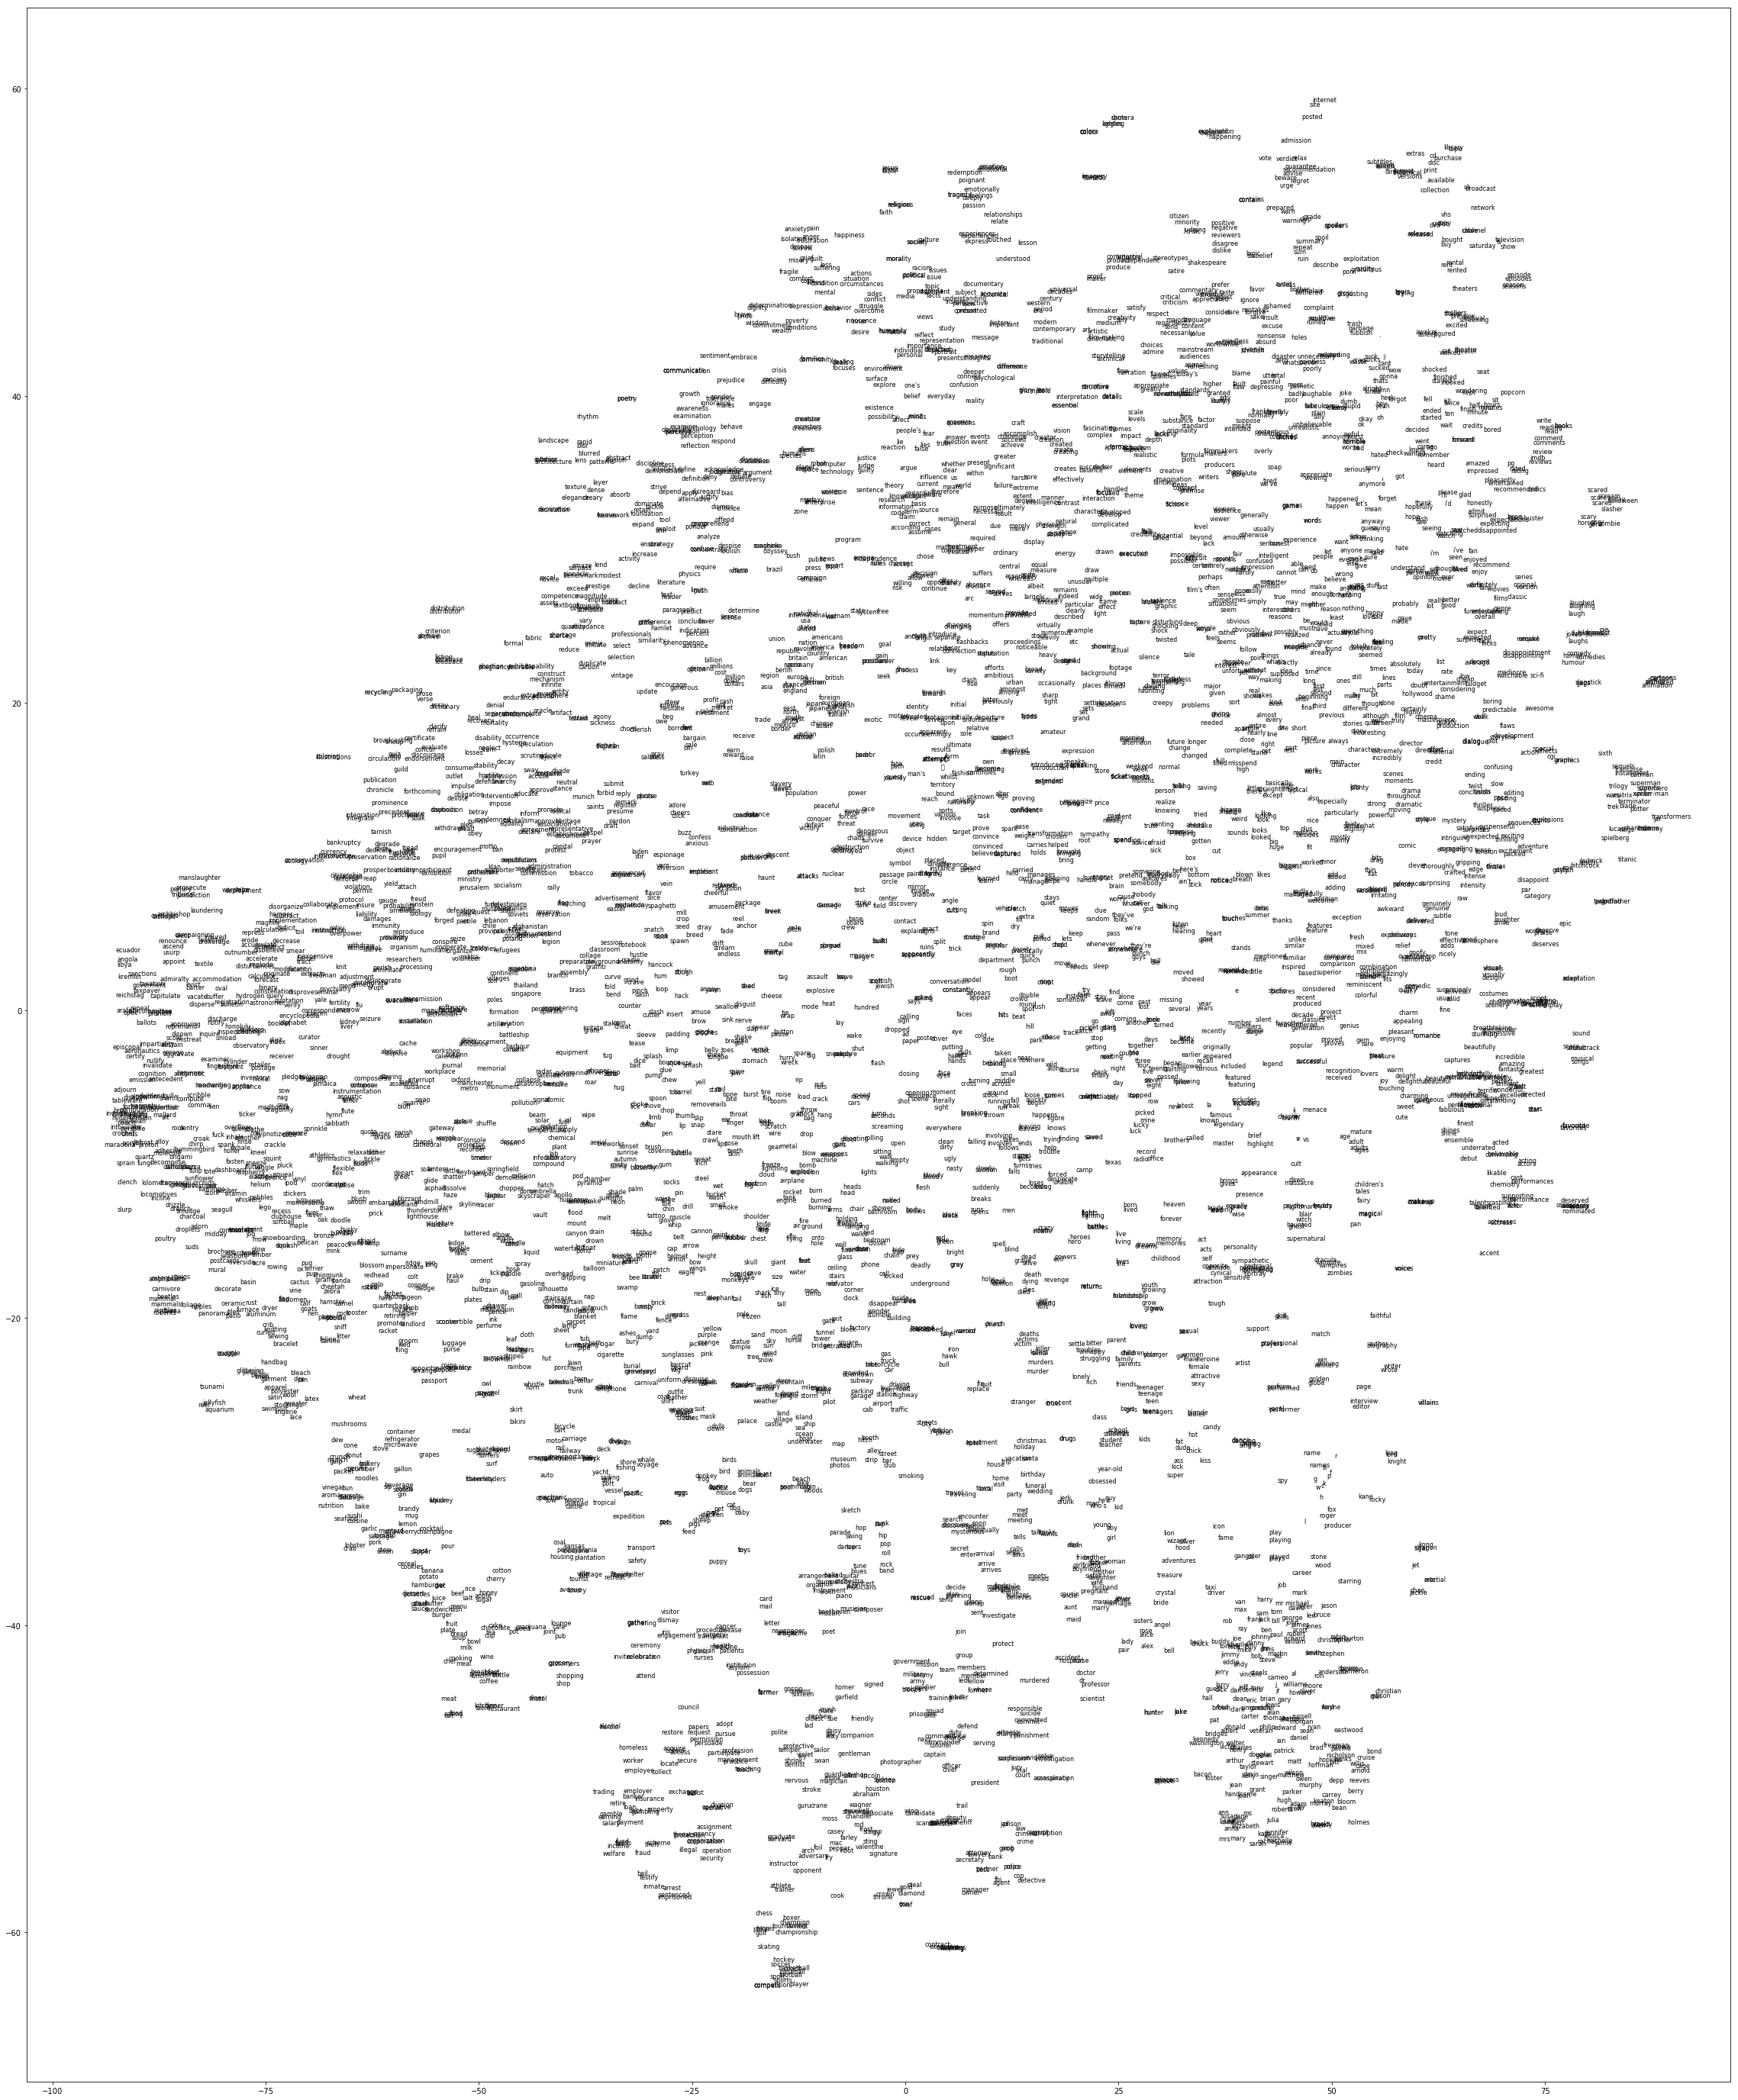

In [32]:
vsm.tsne_viz(imdb20_pmi)

In [50]:
amod = pd.read_csv(os.path.join(DATA_HOME, 'gigawordnyt-advmod-matrix.csv.gz'), index_col=0)

In [52]:
amod.head(100)

,when,also,just,now,more,so,even,how,where,as,...,audio-minis,worldcom,stairway,surreally,cents,obnoxiously,jordy,shoot,screamingly,stone
Word,,,,,,,,,,,,,,,,,,,,,
is,17663,21310,10853,46433,2094,8204,8388,14546,22985,2039,...,0,0,0,0,5,0,0,2,0,0
have,20657,20156,18757,31288,2162,7508,13003,4184,12573,1572,...,0,1,0,0,0,0,0,3,0,0
was,26976,10634,8253,3014,1265,4025,5644,6554,11818,1920,...,0,0,8,0,3,0,0,1,1,0
said,19695,62588,3984,4953,923,4933,6198,575,4209,608,...,0,5,0,0,0,0,1,1,0,0
much,207,145,4184,474,10079,71460,421,64794,140,46174,...,0,0,0,0,0,0,0,0,0,0
are,11546,14212,4929,23470,2418,7591,4779,7952,19832,1214,...,0,0,0,0,1,0,0,0,1,0
get,19342,4004,8474,5811,1401,2657,5930,14477,6840,718,...,0,0,0,0,2,0,0,0,0,0
do,8299,1550,7908,9899,2733,37339,2915,14474,2376,598,...,0,0,0,0,0,0,0,1,0,0
's,7811,9488,8815,13779,1371,3949,4293,1690,6281,1500,...,0,0,0,0,5,0,0,1,0,0


In [54]:
with np.errstate(divide='ignore'):
    test_amod = np.log(amod)

,when,also,just,now,more,so,even,how,where,as,...,audio-minis,worldcom,stairway,surreally,cents,obnoxiously,jordy,shoot,screamingly,stone
Word,,,,,,,,,,,,,,,,,,,,,
is,9.779227,9.966932,9.292197,10.745766,7.646831,9.012377,9.034557,9.585071,10.042597,7.620215,...,-inf,-inf,-inf,-inf,1.609438,-inf,-inf,0.693147,-inf,-inf
have,9.935810,9.911257,9.839322,10.350990,7.678789,8.923724,9.472935,8.339023,9.439307,7.360104,...,-inf,0.000000,-inf,-inf,-inf,-inf,-inf,1.098612,-inf,-inf
was,10.202703,9.271812,9.018332,8.011023,7.142827,8.300280,8.638348,8.787831,9.377379,7.560080,...,-inf,-inf,2.079442,-inf,1.098612,-inf,-inf,0.000000,0.0,-inf
said,9.888120,11.044329,8.290042,8.507749,6.827629,8.503703,8.731982,6.354370,8.344980,6.410175,...,-inf,1.609438,-inf,-inf,-inf,-inf,0.0,0.000000,-inf,-inf
much,5.332719,4.976734,8.339023,6.161207,9.218209,11.176893,6.042633,11.078968,4.941642,10.740172,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
are,9.354094,9.561842,8.502891,10.063478,7.790696,8.934719,8.471987,8.981179,9.895052,7.101676,...,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,0.0,-inf
get,9.870034,8.295049,9.044758,8.667508,7.244942,7.884953,8.687779,9.580316,8.830543,6.576470,...,-inf,-inf,-inf,-inf,0.693147,-inf,-inf,-inf,-inf,-inf
do,9.023890,7.346010,8.975630,9.200189,7.913155,10.527794,7.977625,9.580109,7.773174,6.393591,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-inf
's,8.963288,9.157783,9.084210,9.530901,7.223296,8.281218,8.364741,7.432484,8.745284,7.313220,...,-inf,-inf,-inf,-inf,1.609438,-inf,-inf,0.000000,-inf,-inf


In [8]:
check = pd.DataFrame([[7, 8, 9],[1,2,3],[4,5,6]])

In [9]:
check

,0,1,2
0,7,8,9
1,1,2,3
2,4,5,6


In [10]:
for index, row in check.iterrows():
    print(index)
    for index_, value in row.iteritems():
        print(value)

0
7
8
9
1
1
2
3
2
4
5
6


In [11]:
row_sum = check.sum(axis = 1)

In [12]:
col_sum = check.sum(axis = 0)

In [24]:
smooth_factor = np.minimum.outer(col_sum.values, row_sum.values)

In [26]:
smoothed = pd.DataFrame(smooth_factor)

In [27]:
smoothed * check

,0,1,2
0,84,48,108
1,15,12,45
2,72,30,90


In [28]:
smoothed + 1

,0,1,2
0,13,7,13
1,16,7,16
2,19,7,16
